<h1>  Part 1 Preparing The Data </h1>

In [55]:
import numpy as np
import pandas as pd
import requests

weburl = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

<h1>  install soup library  </h1>

In [56]:

!pip install BeautifulSoup4
from bs4 import BeautifulSoup
soup = BeautifulSoup(weburl,'html.parser')

In [57]:

table=soup.find('table')

In [58]:
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

In [59]:
df

,Postalcode,Borough,Neighborhood


<h1>  take the contents from the site   </h1>

In [60]:
for tr_c in table.find_all('tr'):
    row_data=[]
    for td_c in tr_c.find_all('td'):
        row_data.append(td_c.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [61]:
df.head(11)

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [62]:

df_index = df[df.Borough != 'Not assigned']

In [63]:

df_index.head(5)

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


<h1>   joining  </h1>

In [64]:
result = df_index.groupby(['Postalcode','Borough'], sort = False).agg( ', '.join)

In [65]:

df_new=result.reset_index()
df_new.head(15)

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [66]:
df

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [67]:
df.shape

(180, 3)

<h1 > part 2 <h1>

In [68]:
df_lon_lat = pd.read_csv('Toronto_long_lat_data.csv')
df_lon_lat.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [69]:

df_lon_lat.columns=['Postalcode','Latitude','Longitude']

In [70]:
df_lon_lat.head(10)

,Postalcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [71]:
Toronto_df = pd.merge(df_new, df_lon_lat[['Postalcode','Latitude', 'Longitude']], on='Postalcode')
Toronto_df.head(12)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [72]:

lats = Toronto_df['Latitude'].to_numpy()
longs = Toronto_df['Longitude'].to_numpy()

In [73]:
lats.min(), lats.max(), longs.min(), longs.max()

(43.60241370000001, 43.836124700000006, -79.61581899999999, -79.16049709999999)

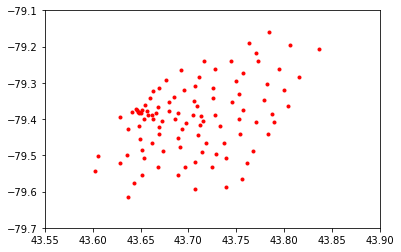

In [77]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.scatter(lats, longs, marker = '.' , color = 'RED')
plt.xlim(43.55, 43.90)
plt.ylim(-79.7, -79.1)
plt.show()

In [78]:
from sklearn.cluster import KMeans

In [79]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [80]:

X = np.array([lats, longs]).transpose()
X.shape

(103, 2)

In [81]:
k_means.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [82]:

k_means_labels = k_means.labels_
k_means_labels

array([2, 2, 0, 3, 0, 1, 2, 3, 0, 0, 3, 1, 2, 0, 0, 0, 3, 1, 2, 0, 0, 1,
       2, 0, 0, 0, 2, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0,
       2, 3, 1, 0, 0, 1, 1, 2, 3, 1, 0, 3, 1, 1, 2, 3, 1, 3, 3, 1, 1, 2,
       3, 3, 0, 1, 1, 2, 3, 3, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

In [83]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 43.66883403, -79.37416041],
       [ 43.68091501, -79.52204367],
       [ 43.76342274, -79.25682511],
       [ 43.74750405, -79.41179209]])